<img src="../../thu_sigs_logo.png" alt="清华深研院-横" style="zoom:50%;" />

In [6]:
#| hide
#| default_exp svd.vis
# pdf:
#   toc: true
#   docx: default

In [7]:
#|hide
%load_ext autoreload
%autoreload 2
%load_ext rich

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rich extension is already loaded. To reload it, use:
  %reload_ext rich


In [8]:
#|hide
from scholarly_infrastructure.logging.nucleus import logger, print
from thu_big_data_ml.help import plt, pio
import treescope

In [10]:
#|hide
treescope.active_autovisualizer.set_globally(treescope.ArrayAutovisualizer())

In [9]:
#| hide 
import nbdev; nbdev.nbdev_export()

::: {.callout-important}
本文档具有一定的交互性，建议使用浏览器打开html文件，这样比pdf文件阅读体验更佳。
:::

## 第一题——一个例子理解 奇异值分解和外积展开式 {#sec-1}

> 试求矩阵$A=\begin{bmatrix}2&4\\1&3\\0&0\\0&0\end{bmatrix}$的奇异值分解并写出其外积展开式.



### 审题 {#sec-1-analysis}

我们首先复习一下李航书上的内容和课件上的内容。

首先是对奇异值分解的理解。

- 什么是方阵的对角化? 奇异值分解和对角化是怎么联系的？

- 矩阵的完全奇异值分解(full singular value decomposition)根据定义一定存在但是不一定唯一，那紧奇异值分解与截断奇异值分解是否唯一？

    - 能不能理解为不一定唯一就是因为不一定满秩，多出来的地方可以乱写？

    - 经过我的初步查询，这确实不唯一的一个原因。但是还有一个原因，特征值是可以有重复的，所以奇异值也可以有重复的。所以对应不用的特征向量，换下顺序，也可以导致不唯一。




然后我们再复习一下什么是外积展开式。

外积 (outer product) 是线性代数中的一个概念，是两个向量的乘积，结果是一个矩阵。外积展开式是将一个矩阵分解为一系列外积的和。
外积是和内积(inner product)相对应的，内积是两个向量的点积，结果是一个标量。

其实本质上，内积就是 $a^T@b$， 外积就是 $a@b^T$，$@$表示矩阵乘法，“内外积”是“向量”的函数，而我们这里把向量类型转化为矩阵类型，用矩阵去理解，这两个操作就是就是换了个顺序矩阵乘法。


那么什么是外积展开式呢？对于 $A = U \Sigma V^T$， 看做是 $A = (U @ \Sigma) @V^T$ 也就是矩阵

$$
U@ \Sigma = \begin{bmatrix}u_1&u_2&\cdots&u_m\end{bmatrix} \begin{bmatrix}\sigma_1&0&\cdots&0\\0&\sigma_2&\cdots&0\\\vdots&\vdots&\ddots&\vdots\\0&0&\cdots&\sigma_n\end{bmatrix} = \begin{bmatrix}u_1\sigma_1&u_2\sigma_2&\cdots&u_m\sigma_m\end{bmatrix}
$$

和矩阵

$$
V^T = \begin{bmatrix}v_1^T\\v_2^T\\\vdots\\v_n^T\end{bmatrix}
$$

相乘。这两个大的矩阵的乘法我们现在注意到，看起来是一个内积的形式，一个行向量乘列向量。所以

$$
A = \begin{bmatrix}u_1\sigma_1&u_2\sigma_2&\cdots&u_m\sigma_m\end{bmatrix} \begin{bmatrix}v_1^T\\v_2^T\\\vdots\\v_n^T\end{bmatrix} = u_1\sigma_1v_1^T + u_2\sigma_2v_2^T + \cdots + u_m\sigma_mv_m^T
$$

我们看到 $u_1\sigma_1v_1^T$, $u_1$ 是列向量， $\sigma_1$ 是标量， $v_1^T$ 是行向量，所以这个式子是一个外积的形式。所以上面这个式子就把A展开为多个外积的和，称为外积展开式。

复习之后，我们来看看题目询问的问题。本题我们需要把因子分解式写出来。

### 解题 {#sec-1-solution}



#### 解法一：手工推导法（考试写解答题）

我们先来求矩阵$ A $ 的奇异值分解 $ A = U  \Sigma V^T $ 。矩阵 $ A $ 是一个 $ 4 \times 2 $ 的矩阵：

$$
A = \begin{bmatrix}
2 & 4 \\
1 & 3 \\
0 & 0 \\
0 & 0
\end{bmatrix}
$$

首先，我们要计算 $ A^T A $，从而找到奇异值和奇异向量。

计算 $ A^T A $：

$$
A^T = \begin{bmatrix}
2 & 1 & 0 & 0 \\
4 & 3 & 0 & 0
\end{bmatrix}
$$

于是，

$$
A^T A = \begin{bmatrix}
2 & 1 & 0 & 0 \\
4 & 3 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
2 & 4 \\
1 & 3 \\
0 & 0 \\
0 & 0
\end{bmatrix}
= \begin{bmatrix}
2 \times 2 + 1 \times 1 + 0 \times 0 + 0 \times 0 & 2 \times 4 + 1 \times 3 + 0 \times 0 + 0 \times 0 \\
4 \times 2 + 3 \times 1 + 0 \times 0 + 0 \times 0 & 4 \times 4 + 3 \times 3 + 0 \times 0 + 0 \times 0
\end{bmatrix}
= \begin{bmatrix}
5 & 11 \\
11 & 25
\end{bmatrix}
$$

---


接下来，我们需要找出 $ A^T A $ 的特征值（eigenvalue，这里的特征是eigen，不是feature，这是来自于德语eigen，意思是“特定于...的”，这里是指“特定于矩阵自身本质的”）和特征向量（eigenvector，而不是 feature vector）。$ A^T A $ 的特征值 $ \lambda = \sigma^2 $ 满足方程：

$$
\det(A^T A - \sigma^2 I) = 0
$$

其中 $\sigma$ 我们叫做 矩阵 $ A $ 的奇异值，我们能把$x$ 写成这样，是因为$ A^T A $ 的特征值一定是非负的。

所以，

$$
\det\left(\begin{bmatrix}
5 - \sigma^2 & 11 \\
11 & 25 - \sigma^2
\end{bmatrix}\right) = (5 - \sigma^2)(25 - \sigma^2) - 121 = 0
$$

展开行列式：

$$
(5 - \sigma^2)(25 - \sigma^2) - 121 = 125 - 30 \sigma^2 + \sigma^4 - 121 = \sigma^4 - 30 \sigma^2 + 4 = 0
$$

这是一个关于 $ \lambda $ 的二次方程

$$
\lambda^2 - 30\lambda + 4 = 0
$$

使用求根公式：

$$
\lambda = \frac{30 \pm \sqrt{900 - 16}}{2} = \frac{30 \pm \sqrt{884}}{2} = \frac{30 \pm 2\sqrt{221}}{2} = 15 \pm \sqrt{221}
$$

于是，奇异值的平方分别是 $ \sigma_1^2 = 15 + \sqrt{221} $ 和 $ \sigma_2^2 = 15 - \sqrt{221} $。因此，奇异值为：

$$
\sigma_1 = \sqrt{15 + \sqrt{221}}, \quad \sigma_2 = \sqrt{15 - \sqrt{221}}
$$

所以奇异值分解的奇异值矩阵 $ \Sigma $ 为：

$$
\Sigma = \begin{bmatrix}
\sqrt{15 + \sqrt{221}} & 0 \\
0 & \sqrt{15 - \sqrt{221}} \\
0 & 0 \\
0 & 0
\end{bmatrix}
$$

考试的时候按计算器，得到数值结果：


In [40]:
import sympy as sp

expr1 = sp.sqrt(15 + sp.sqrt(221))
expr2 = sp.sqrt(15 - sp.sqrt(221))

Sigma = sp.Matrix([[expr1, 0],
                   [0, expr2],
                   [0, 0], 
                   [0, 0]])

Sigma_float = Sigma.applyfunc(sp.N)

Sigma_float



Matrix([
[5.46498570421904,                 0],
[               0, 0.365966190626258],
[               0,                 0],
[               0,                 0]])


--- 


接下来，我们需要找到对应的奇异向量。

对于 $ \sigma_1 $，满足：

$$
(A^T A - \sigma_1^2 I) v_1 = 0
$$

其实就是这个减法之后的矩阵的零空间。

代入 $ \sigma_1^2 = 15 + \sqrt{221} $：

$$
\begin{bmatrix}
5 - (15 + \sqrt{221}) & 11 \\
11 & 25 - (15 + \sqrt{221})
\end{bmatrix}
= \begin{bmatrix}
-10 - \sqrt{221} & 11 \\
11 & 10 - \sqrt{221}
\end{bmatrix}
$$

解方程：

$$
(-10 - \sqrt{221})v_{11} + 11 v_{12} = 0 \\
11 v_{11} + (10 - \sqrt{221})v_{12} = 0
$$

我们可以瞬间看出，这两个方程是线性相关的，$ (-10-\sqrt{221}) \times (10-\sqrt{221}) = ((-\sqrt{221})^2 - (10)^2) = 221-100 = 121 = 11^2 = 11 \times 11$

其实这是因为我们刚才求解特征值的时候，代数重数只有1，所以这里的几何重数也只有1，所以只有一个线性无关的方程。

::: {.callout-note}

**代数重数（Algebraic Multiplicity）** 是指一个特征值作为多项式的根出现的次数。比如，如果我们有一个特征多项式 $ \det(A - \lambda I) = (\lambda - 2)^3 (\lambda + 1)^2 $，那么 $ \lambda = 2 $ 的代数重数就是 3，$ \lambda = -1 $ 的代数重数是 2。

**几何重数（Geometric Multiplicity）** 则是对应于一个特征值的特征空间的维度。也就是说，对于一个特征值 $ \lambda $，几何重数就是线性无关的特征向量的数量。例如，如果 $ \lambda = 2 $ 对应的特征空间有 2 个线性无关的特征向量，那么它的几何重数就是 2。

对于任意一个特征值，它的几何重数总是小于或等于它的代数重数。也就是说，
$ \text{几何重数} \leq \text{代数重数} $
这个结论说明，虽然一个特征值在特征多项式中可能出现很多次，但实际对应的独立特征向量的数量可能更少。

:::


所以我们可以只看第一个方程：

$$
v_{12} = \frac{10 + \sqrt{221}}{11} v_{11}
$$

随便取 $ v_{11} = 11 $，则 $ v_{12} = 10 + \sqrt{221} $，就可以作为特征向量。本来就特征向量而言，我们可以归一化也可以不归一化，都是特征向量。

但是SVD要求V是个正交矩阵对不对？所以我们必须要归一化。
为了归一化，我们计算模长：

$$
\|v_1\| = \sqrt{11^2 + (10 + \sqrt{221})^2} = \sqrt{121 + 100 + 20\sqrt{221} + 221} = \sqrt{442 + 20\sqrt{221}}
$$

于是，归一化的 $ v_1 $ 为：

$$
v_1 = \frac{1}{\sqrt{442 + 20\sqrt{221}}} \begin{bmatrix} 11 \\ 10 + \sqrt{221} \end{bmatrix}
$$

同理，对于 $ \sigma_2 $，可以得到：

$$
v_2 = \frac{1}{\sqrt{442 - 20\sqrt{221}}} \begin{bmatrix} 11 \\ 10 - \sqrt{221} \end{bmatrix}
$$

现在，我有了 $ V $ 矩阵的列向量 $ v_1 $ 和 $ v_2 $。

$V$ 矩阵为 

$$
V = \begin{bmatrix} v_1 & v_2 \end{bmatrix} 
$$

模拟考试的时候按计算器，sympy得到数值结果

In [47]:
from sympy import symbols, sqrt, Rational, N, Matrix
v1 = Matrix([11, 10 + sqrt(221)]) / sqrt(442 + 20 * sqrt(221))
v2 = Matrix([11, 10 - sqrt(221)]) / sqrt(442 - 20 * sqrt(221))
V = Matrix.hstack(v1, v2)
N(V)




Matrix([
[0.404553584833757,  0.914514295677304],
[0.914514295677304, -0.404553584833757]])


---

接下来，我们需要找到 $ U $ 矩阵。由于 $ A $ 是 $ 4 \times 2 $ 的矩阵，$ U $ 将是 $ 4 \times 4 $ 的矩阵。前两列对应于非零奇异值，后两列需要补充正交向量。

首先，计算 $ u_i = \frac{1}{\sigma_i} A v_i $：

对于 $ u_1 $：

$$
u_1 = \frac{1}{\sigma_1} A v_1 = \frac{1}{\sqrt{15 + \sqrt{221}}} \begin{bmatrix}
2 & 4 \\
1 & 3 \\
0 & 0 \\
0 & 0
\end{bmatrix}
\frac{1}{\sqrt{442 + 20\sqrt{221}}} \begin{bmatrix} 11 \\ 10 + \sqrt{221} \end{bmatrix}
$$

对于 $ u_2 $：

$$
u_2 = \frac{1}{\sigma_2} A v_2 = \frac{1}{\sqrt{15 - \sqrt{221}}} \begin{bmatrix}
2 & 4 \\
1 & 3 \\
0 & 0 \\
0 & 0
\end{bmatrix}
\frac{1}{\sqrt{442 - 20\sqrt{221}}} \begin{bmatrix} 11 \\ 10 - \sqrt{221} \end{bmatrix}
$$



这个计算有点儿复杂，我们使用sympy模拟手工化简过程：

In [28]:
from sympy import symbols, sqrt, Rational, Matrix, simplify, N

# 定义符号
x_plus = sqrt(15 + sqrt(221))
x_minus = sqrt(15 - sqrt(221))
y_plus = sqrt(442 + 20*sqrt(221))
y_minus = sqrt(442 - 20*sqrt(221))
A = Matrix([[2, 4], [1, 3], [0, 0], [0, 0]])

In [29]:
expr_plus = (1 / x_plus)  * (1 / y_plus) * (A* Matrix([11, 10 + sqrt(221)]))
simplified_expr_plus = simplify(expr_plus)
simplified_expr_plus


Matrix([
[    sqrt(2)*(2*sqrt(221) + 31)/sqrt(371*sqrt(221) + 5525)],
[sqrt(2)*(41 + 3*sqrt(221))/(2*sqrt(371*sqrt(221) + 5525))],
[                                                        0],
[                                                        0]])

In [30]:
approx_plus = N(simplified_expr_plus)
approx_plus


Matrix([
[0.817415560470363],
[0.576048436766321],
[                0],
[                0]])

In [32]:
expr_minus = 1 / x_minus *  A * (1 / y_minus) * Matrix([11, 10 - sqrt(221)])
simplified_expr_minus = simplify(expr_minus)
simplified_expr_minus


Matrix([
[    sqrt(2)*(31 - 2*sqrt(221))/sqrt(5525 - 371*sqrt(221))],
[sqrt(2)*(41 - 3*sqrt(221))/(2*sqrt(5525 - 371*sqrt(221)))],
[                                                        0],
[                                                        0]])

In [33]:
approx_minus = N(simplified_expr_minus)
approx_minus


Matrix([
[ 0.576048436766321],
[-0.817415560470363],
[                 0],
[                 0]])

In [38]:
#| hide
import sympy as sp
print(sp.latex(Matrix([0, 0, 1, 0])))

Tue 2024-12-17 21:18:17.843855

INFO     \left[\begin{matrix}0\\0\\1\\0\end{matrix}\right]                                            ]8;id=331077;file:///home/ycm/repos/novelties/cv/ScholarlyInfrastructure/scholarly_infrastructure/logging/nucleus.py\nucleus.py]8;;\:]8;id=619088;file:///home/ycm/repos/novelties/cv/ScholarlyInfrastructure/scholarly_infrastructure/logging/nucleus.py#53\53]8;;\


---

接下来，我们还需要补充 $ u_3 $ 和 $ u_4 $ 使其成为正交矩阵。很简单，因为 $u_1$ 和 $u_2$ 剩下两个维度都是0， 所以把这两个维度随便取两个正交的向量就可以了，直接标准正交基就可以了。

所以 $u_3 = \left[\begin{matrix}0\\0\\1\\0\end{matrix}\right]$ 和 $u_4 = \left[\begin{matrix}0\\0\\0\\1\end{matrix}\right]$。

所以 $ U $ 矩阵为：

$$
U = \begin{bmatrix}
u_1 & u_2 & u_3 & u_4
\end{bmatrix}


---

上面我们已经依次完成了 $ \Sigma, V, U $ 的构造，最终可以写出奇异值分解 $ A = U \Sigma V^T $。


相应的外积展开式就是：

$$
A = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T
$$



ote, 这题的数值太繁琐了，希望考试不是这样的题


#### 解法二：使用机器学习库（科研使用）


In [50]:
import numpy as np

A = np.array([[2, 4],
              [1, 3],
              [0, 0],
              [0, 0]])

直接使用numpy库中的 `numpy.linalg.svd` 函数，可以直接得到奇异值分解的结果。

In [53]:
U, Sigma, VT = np.linalg.svd(A)
U, Sigma, VT


(
    array([[-0.81741556, -0.57604844,  0.        ,  0.        ],
       [-0.57604844,  0.81741556,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]),
    array([5.4649857 , 0.36596619]),
    array([[-0.40455358, -0.9145143 ],
       [-0.9145143 ,  0.40455358]])
)

In [54]:
treescope.show(U, Sigma, VT)

TreescopeFigure(
    treescope_part=PreventWordWrap(
        child=Siblings(
            children=(
                RoundtripCondition(
                    roundtrip=Siblings(
                        children=(
                            WithDynamicSharedPip(
                                child=FoldableTreeNodeImpl(
                                    contents=FoldCondition(
                                        collapsed=EmptyPart(),
                                        expanded=IndentedChildren(
                                            children=[
                                                Siblings(
                                                    children=(
                                                        Text(
                                                            text='array([[-0.81741556, -0.57604844,  0.        ,  0.        ],\n       [-0.57604844,  0.81741556,  0.        ,  0.        ],\n       [ 0.        ,  0.        ,  1.        ,  0.        ],\n       [ 0.        ,  0.        ,  0.        ,  1.        ]])'
                                                        ),
                                                    )
                                                )
                                            ]
                                        )
                                    ),
                                    label=AbbreviationColor(
                                        child=CommentColorWhenExpanded(
                                            child=Siblings(
                                                children=(
                                                    FoldCondition(
                                                        collapsed=Text(text='<'),
                                                        expanded=Text(text='# ')
                                                    ),
                                                    Text(
                                                        text='np.ndarray float64(4, 4) ≈0.053 ±0.5 [≥-0.82, ≤1.0] zero:10 nonzero:6'
                                                    ),
                                                    FoldCondition(
                                                        collapsed=Text(text='>'),
                                                        expanded=EmptyPart()
                                                    )
                                                )
                                            )
                                        )
                                    ),
                                    expand_state=<ExpandState.WEAKLY_EXPANDED: 'weakly_expanded'>
                                ),
                                node_id=140171242664464,
                                seen_more_than_once=set()
                            ),
                        )
                    ),
                    not_roundtrip=FoldableTreeNodeImpl(
                        contents=Siblings(
                            children=(
                                FoldCondition(
                                    collapsed=EmptyPart(),
                                    expanded=IndentedChildren(
                                        children=[
                                            Siblings(
                                                children=(
                                                    ArrayvizRendering(
                                                        html_src='<div class="arrayviz_container"><span class="loading_message">Rendering array...</span><treescope-run-here><script type="application/octet-stream">const parent = this.parentNode; const defns = this.getRootNode().host.defns; defns.runSoon(() => { const tpl = parent.querySelector(\'template.deferred_args\'); const config = JSON.parse( tpl.content.querySelector(\'script\').textContent ); tpl.remove(); defns.arrayviz.buildArrayvizFigure(parent, config); });</script></tr

numpy的结果稍微和我们第一题的有点不一样，$U$和$V$的方向都和我们相反。这是因为奇异值分解的结果不唯一，一个特征向量的相反方向也是特征向量。刚才我们只是限定了模长为1，但是没有限定方向，这也是不唯一性的来源之一。


## 第二题——一个例题理解奇异值的应用 {#sec-2}

题目如下
> 搜索中的点击数据记录网页搜索时提交的查询语句，点击的网页URL以及点击的次数构成一个二部图，其中一个结点集合$\{q_{i}\}$表示查询，另一个结点集合$\{u_{j}\}$表示URL，边表示点击关系，边上的权重表示点击次数。图15.2是一个简化的点击数据例。点击数据可以由矩阵表示，试对该矩阵进行奇异值分解，并解释得到的三个矩阵所表示的内容。

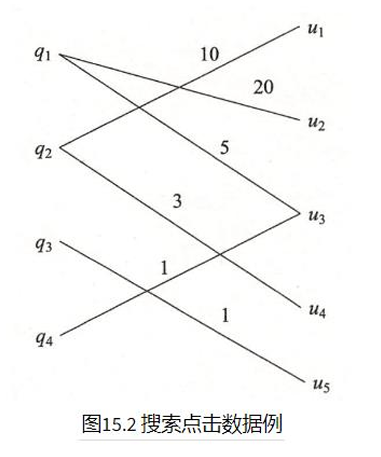

### 审题

- 什么是二部图？
    - 二部图是一种特殊的图结构，它是由两个节点集组成的图，这两个节点集中的节点之间没有直接的连接。换句话说，查询是查询，网页是网页，查询和查询之间没有边，网页和网页之间也没有边，只有查询和网页之间有边。这种图结构叫做二部图。
    - 所有图都可以用邻接矩阵表示，正方形的邻接矩阵表示点与点之间是否有边，而由于二部图的性质，邻接矩阵是一个长方形的矩阵，其中行表示查询，列表示网页，矩阵元素表示查询和网页之间的边的权重。

现在来理解题目，题目二部图用邻接矩阵表示怎么表示呢？

<!-- 智谱清言的数数逻辑不对，无法正确给出关系；我们应该一步一步数 -->
注意到

- $q_1 \rightarrow u_2$: 20次

- $q_1 \rightarrow u_3$: 5次

- $q_2 \rightarrow u_1$: 10次

- $q_2 \rightarrow u_4$: 3次

- $q_3 \rightarrow u_5$: 1次

- $q_4 \rightarrow u_3$: 1次

因此稀疏矩阵为

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
click_data = [
    (0, 1, 20),  # q1 -> u2
    (0, 2, 5),   # q1 -> u3
    (1, 0, 10),  # q2 -> u1
    (1, 3, 3),   # q2 -> u4
    (2, 4, 1),   # q3 -> u5
    (3, 2, 1)    # q4 -> u3
]

# 从click_data中提取行、列和数据
rows, cols, data = zip(*click_data)

# 创建稀疏矩阵，4个查询，5个URL
clicks_matrix = csr_matrix((data, (rows, cols)), shape=(4, 5))
treescope.show(clicks_matrix)

TreescopeFigure(
    treescope_part=PreventWordWrap(
        child=Siblings(
            children=(
                WithDynamicSharedPip(
                    child=Siblings(
                        children=(
                            FoldableTreeNodeImpl(
                                contents=AbbreviationColor(
                                    child=Siblings(
                                        children=(
                                            Text(
                                                text="<4x5 sparse matrix of type '<class 'numpy.int64'>'"
                                            ),
                                            FoldCondition(
                                                collapsed=CommentColor(child=Text(text='↩')),
                                                expanded=Text(text='\n')
                                            ),
                                            Text(
                                                text='\twith 6 stored elements in Compressed Sparse Row format>'
                                            )
                                        )
                                    )
                                ),
                                label=EmptyPart(),
                                expand_state=<ExpandState.EXPANDED: 'expanded'>
                            ),
                        )
                    ),
                    node_id=140171090867968,
                    seen_more_than_once=set()
                ),
            )
        )
    )
)

对应的稠密矩阵为

In [59]:
dense_clicks_matrix = clicks_matrix.toarray()
dense_clicks_matrix


array([[ 0, 20,  5,  0,  0],
       [10,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  1,  0,  0]])

其中每一行是一个查询query，每一列是一个网页url

In [60]:
treescope.show(dense_clicks_matrix)

TreescopeFigure(
    treescope_part=PreventWordWrap(
        child=Siblings(
            children=(
                RoundtripCondition(
                    roundtrip=Siblings(
                        children=(
                            WithDynamicSharedPip(
                                child=FoldableTreeNodeImpl(
                                    contents=FoldCondition(
                                        collapsed=EmptyPart(),
                                        expanded=IndentedChildren(
                                            children=[
                                                Siblings(
                                                    children=(
                                                        Text(
                                                            text='array([[ 0, 20,  5,  0,  0],\n       [10,  0,  0,  3,  0],\n       [ 0,  0,  0,  0,  1],\n       [ 0,  0,  1,  0,  0]])'
                                                        ),
                                                    )
                                                )
                                            ]
                                        )
                                    ),
                                    label=AbbreviationColor(
                                        child=CommentColorWhenExpanded(
                                            child=Siblings(
                                                children=(
                                                    FoldCondition(
                                                        collapsed=Text(text='<'),
                                                        expanded=Text(text='# ')
                                                    ),
                                                    Text(
                                                        text='np.ndarray int64(4, 5) [≥0, ≤20] zero:14 nonzero:6'
                                                    ),
                                                    FoldCondition(
                                                        collapsed=Text(text='>'),
                                                        expanded=EmptyPart()
                                                    )
                                                )
                                            )
                                        )
                                    ),
                                    expand_state=<ExpandState.WEAKLY_EXPANDED: 'weakly_expanded'>
                                ),
                                node_id=140169075028784,
                                seen_more_than_once=set()
                            ),
                        )
                    ),
                    not_roundtrip=FoldableTreeNodeImpl(
                        contents=Siblings(
                            children=(
                                FoldCondition(
                                    collapsed=EmptyPart(),
                                    expanded=IndentedChildren(
                                        children=[
                                            Siblings(
                                                children=(
                                                    ArrayvizRendering(
                                                        html_src='<div class="arrayviz_container"><span class="loading_message">Rendering array...</span><treescope-run-here><script type="application/octet-stream">const parent = this.parentNode; const defns = this.getRootNode().host.defns; defns.runSoon(() => { const tpl = parent.querySelector(\'template.deferred_args\'); const config = JSON.parse( tpl.content.querySelector(\'script\').textContent ); tpl.remove(); defns.arrayviz.buildArrayvizFigure(parent, config); });</script></treescope-run-here><template class="deferred_args"><script type="application/json">{"info": "Showing integer digits as nested squares. Hover/click fo

用数据重新画出二分图验证

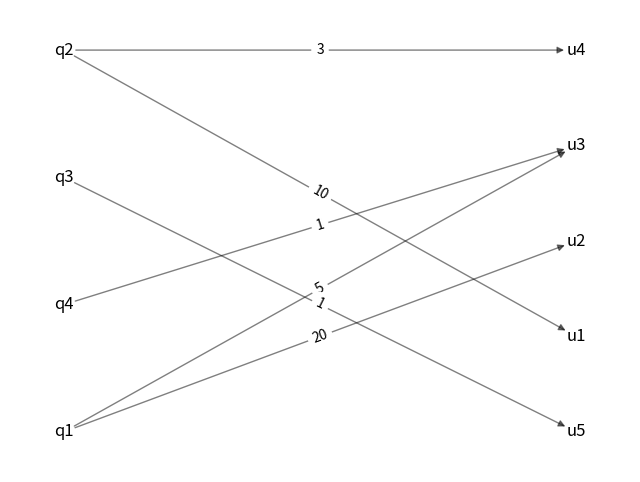

In [58]:
import networkx as nx
import matplotlib.pyplot as plt
# 创建一个有向图
G = nx.DiGraph()

click_data_pretty = [(f"q{q+1}", f"u{u+1}", weight) for q, u, weight in click_data]
# 添加节点
queries = {click[0] for click in click_data_pretty}
urls = {click[1] for click in click_data_pretty}
G.add_nodes_from(queries, bipartite=0)
G.add_nodes_from(urls, bipartite=1)

# 添加带权重的边
for q, u, weight in click_data_pretty:
    G.add_edge(q, u, weight=weight)

# 绘制图形
pos = nx.drawing.layout.bipartite_layout(G, queries)
plt.figure(figsize=(8, 6))

# 绘制边和权重
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(q, u): d['weight'] for q, u, d in edges})

plt.axis('off')
plt.show()

### 解题 {#sec-2-solution}


#### 解法二：使用机器学习库（科研使用）


直接使用numpy库中的 `numpy.linalg.svd` 函数，可以直接得到奇异值分解的结果。

In [61]:
U_click, Sigma_click, VT_click = np.linalg.svd(dense_clicks_matrix)
U_click, Sigma_click, VT_click


(
    array([[ 9.99930496e-01, -1.01352447e-16,  0.00000000e+00,
        -1.17899939e-02],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        -8.65973959e-15],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 1.17899939e-02,  8.65973959e-15,  0.00000000e+00,
         9.99930496e-01]]),
    array([20.61695792, 10.44030651,  1.        ,  0.97007522]),
    array([[ 0.00000000e+00,  9.70007796e-01,  2.43073808e-01,
         0.00000000e+00,  0.00000000e+00],
       [ 9.57826285e-01, -2.31404926e-16,  8.02571613e-16,
         2.87347886e-01,  0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [-7.97105437e-16, -2.43073808e-01,  9.70007796e-01,
         0.00000000e+00,  0.00000000e+00],
       [ 2.87347886e-01, -1.01402229e-16,  2.10571835e-16,
        -9.57826285e-01,  0.00000000e+00]])
)

In [62]:
treescope.show(U_click, Sigma_click, VT_click)

TreescopeFigure(
    treescope_part=PreventWordWrap(
        child=Siblings(
            children=(
                RoundtripCondition(
                    roundtrip=Siblings(
                        children=(
                            WithDynamicSharedPip(
                                child=FoldableTreeNodeImpl(
                                    contents=FoldCondition(
                                        collapsed=EmptyPart(),
                                        expanded=IndentedChildren(
                                            children=[
                                                Siblings(
                                                    children=(
                                                        Text(
                                                            text='array([[ 9.99930496e-01, -1.01352447e-16,  0.00000000e+00,\n        -1.17899939e-02],\n       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,\n        -8.65973959e-15],\n       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,\n         0.00000000e+00],\n       [ 1.17899939e-02,  8.65973959e-15,  0.00000000e+00,\n         9.99930496e-01]])'
                                                        ),
                                                    )
                                                )
                                            ]
                                        )
                                    ),
                                    label=AbbreviationColor(
                                        child=CommentColorWhenExpanded(
                                            child=Siblings(
                                                children=(
                                                    FoldCondition(
                                                        collapsed=Text(text='<'),
                                                        expanded=Text(text='# ')
                                                    ),
                                                    Text(
                                                        text='np.ndarray float64(4, 4) ≈0.25 ±0.43 [≥-0.012, ≤1.0] zero:7 nonzero:9'
                                                    ),
                                                    FoldCondition(
                                                        collapsed=Text(text='>'),
                                                        expanded=EmptyPart()
                                                    )
                                                )
                                            )
                                        )
                                    ),
                                    expand_state=<ExpandState.WEAKLY_EXPANDED: 'weakly_expanded'>
                                ),
                                node_id=140169073692944,
                                seen_more_than_once=set()
                            ),
                        )
                    ),
                    not_roundtrip=FoldableTreeNodeImpl(
                        contents=Siblings(
                            children=(
                                FoldCondition(
                                    collapsed=EmptyPart(),
                                    expanded=IndentedChildren(
                                        children=[
                                            Siblings(
                                                children=(
                                                    ArrayvizRendering(
                                                        html_src='<div class="arrayviz_container"><span class="loading_message">Rendering array...</span><treescope-run-here><script type="application/octet-stream">const parent = this.parentNode; const defns = this.getRootNode().host.defns; defns.runSoon(() => { const tpl = parent.querySelector(\'template.deferred_args\'); const config = JSON.parse( tpl.content.querySelector(\'script\

现在我们来解释这三个矩阵所表示的内容。

<!-- U是左奇异向量矩阵，每一列是一个左奇异向量，代表A的行空间的一组正交基。这里的行空间是指查询的空间，所以U的每一列代表原矩阵A的一个行向量在新的正交基下的 -->


我们可以从线性变换的角度来理解奇异值分解对这个评分矩阵的作用。我们可以把评分矩阵 $ A $ 看作是一个线性变换，那么$q = A u$， u是 one hot 形式的user向量，表示是哪一个user，那么给定我一个user，我用 A 矩阵乘法就可以得到这个 user 对所有 query 的评分。如果u不是one hot向量，那就是网页的混合，想要知道这些网页对query的线性加权评分。

注意，由于 $V = [ v_1, v_2, \cdots, v_n ]$ 但是这样似乎没有任何意义，因为网页 one hot 向量是和转置后的V去做矩阵乘法，所以one hot并不是在选择特征向量，没有这样的对应关系。

根据李航书的“几何解释”的讲解，线性变换可以分解为三个简单的变换：一个坐标系的旋转或反射变换、一个坐标轴的缩放变换、另一个坐标系的旋转或反射变换；而奇异值定理保证这种分解一定存在。其中 $V^T$ 就是旋转或者反射变换，$\Sigma$ 是缩放变换，$U$ 是另一个旋转或者反射变换。

如果只有两个网页和两个query，我们可以直观的看图理解这个变换。图的左上角的黑色和白色向量就是两个user的one hot向量，经过评分矩阵的线性变换，这两个向量变成了图右上角的位置，坐标的意义变成了对两个query评分的值。而SVD则是将这个左上角到右上角的变换分解为左上角到左下角的变换，左下角到右下角的变换，右下角到右上角的变换。首先把网页向量旋转了一下，然后缩放了一下，最后再旋转一下，就得到了最终的评分。由于缩放了一下才转回去，所以就利用到了其他的网页的信息来预测这个网页的评分。

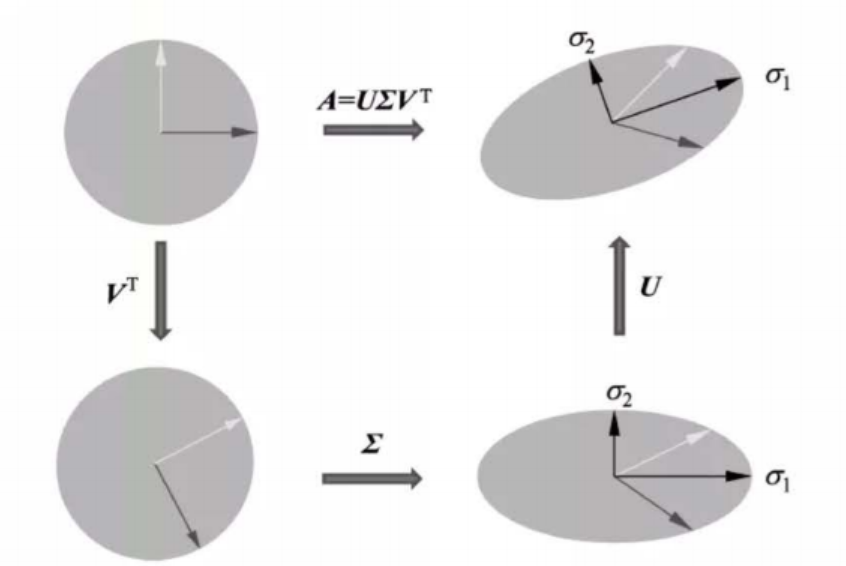

---

网页https://datawhalechina.github.io/statistical-learning-method-solutions-manual/#/chapter15/ch15 提到了 

> 根据奇异值分解定理，可知：U表示网页输入的查询语句与网页特征之间的关系矩阵, V表示网页与网页特征之间的相似性, Σ表示网页输入的查询语句映射到网页的权重.
> 举个例子: 从矩阵 $U$ 的第一列可以表示查询语句 $q_{1}$ 与网页特征 1 的关系密切, 通过矩阵 $V$ 可以表示 网页 $u_2$ 与特征 1 的相似度最高, 所以查询 $q_1$ 的时候点击网页 $u_2$ 的次数是最多的。

然而，我在李航书上的奇异值分解定理看了很久，并没有看出这个解释的合理性。

而且这个解释并不符合逻辑，完全无法站住脚，矩阵U的维度是 4x4, 查询q有4个，网页有5个，网页特征也有5个，怎么可能通过U的第一列就能表示查询语句 $q_{11}$ 与网页特征 1 的关系密切呢？那第五个网页怎么办？
而且这个解释没有给出参考文献，我无法验证这个解释的正确性。

---

论文 "CONCOLLA – A SMART EMOTION-BASED MUSIC RECOMMENDATION SYSTEM FOR
DRIVERS" https://www.scpe.org/index.php/scpe/article/download/2467/830 认为,
U 矩阵捕捉了用户的偏好，而V矩阵包含了物品的特征，而$\Sigma$是分解的显著度。论文中的“用户”和“物品”对应于我们的“查询”和“网页”。

论文 "Recommender Systems in Light of Big Data" (http://ijece.iaescore.com/index.php/IJECE/article/download/5783/4517) 则是认为，奇异值越大，表示那个特征对用户-项目交互数据的解释能力越强。

---

我们还可以从矩阵近似的角度来解释，SVD分解是对评分矩阵的F范数下的最优近似(意思是以这三个矩阵的形式作为参数的所有矩阵中，截断SVD找到的矩阵是最优的，如果不是用三个矩阵去参数化，那当然最优的矩阵就是原本的矩阵啦；如果用推荐系统中的矩阵分解，那又是另一个参数化方式，虽然可以归纳为$ \Sigma= I$的情况；如果是因子分解机、SVD++，也是会有所不同)，因为现实中推荐系统的评分矩阵太大了，而且很稀疏，很多时候想要补全来完成推荐，所以用SVD的低秩版本去近似，认为能够保留最重要的信息，去掉噪声。
我们试一下，用SVD的结果去近似原矩阵，看看近似的效果。

In [65]:
reconstructed_clicks_list = []
for r in range(1, 5):
    reconstructed_clicks = U_click[:, :r] @ np.diag(Sigma_click[:r]) @ VT_click[:r, :]
    reconstructed_clicks_list.append(reconstructed_clicks)

In [66]:
treescope.show(reconstructed_clicks_list)

TreescopeFigure(
    treescope_part=PreventWordWrap(
        child=Siblings(
            children=(
                WithDynamicSharedPip(
                    child=FoldableTreeNodeImpl(
                        contents=Siblings(
                            children=(
                                IndentedChildren(
                                    children=[
                                        Siblings(
                                            children=(
                                                RoundtripCondition(
                                                    roundtrip=Siblings(
                                                        children=(
                                                            WithDynamicSharedPip(
                                                                child=FoldableTreeNodeImpl(
                                                                    contents=FoldCondition(
                                                                        collapsed=EmptyPart(),
                                                                        expanded=IndentedChildren(
                                                                            children=[
                                                                                Siblings(
                                                                                    children=(
                                                                                        Text(
                                                                                            text='array([[ 0.        , 19.99721992,  5.01109415,  0.        ,  0.        ],\n       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],\n       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],\n       [ 0.        ,  0.23578349,  0.05908488,  0.        ,  0.        ]])'
                                                                                        ),
                                                                                    )
                                                                                )
                                                                            ]
                                                                        )
                                                                    ),
                                                                    label=AbbreviationColor(
                                                                        child=CommentColorWhenExpanded(
                                                                            child=Siblings(
                                                                                children=(
                                                                                    FoldCondition(
                                                                                        collapsed=Text(
                                                                                            text='<'
                                                                                        ),
                                                                                        expanded=Text(
                                                                                            text='# '
                                                                                        )
                                                                                    ),
                                                                                    Text(
                                                                                        text='np.ndarray float64(4, 5) ≈1.3 ±4.4 [≥0.0, ≤2e+01] zero:16 nonzero:4'
                                                                                    ),
                                                                                    FoldCondition(
                    

让我疑惑的是，从这个例子来看，截断SVD不能恢复出原本是0的位置的信息，起不到补全的作用，反而把本来很清晰的评分弄成了0，那么这个截断SVD的作用是什么呢？数据压缩可不是推荐系统的目的啊。

从这里例子来看，我看不出所谓的“压缩即智能”（https://mp.weixin.qq.com/s/XI13wa4HugcOMNHilBPVkw）（https://mp.weixin.qq.com/s/LEEXJKIW-nSci7AEHxVH1Q）

由于展示没有做这个方向，这个问题我暂且放过，后面需要再深入研究。

### 扩展问题：奇异值分解在最新的AI科研中的应用有哪些？


In [74]:
#| hide
import nbdev; nbdev.nbdev_export()